In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('/content/spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'text']

In [3]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [4]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['text'])
y = data['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [7]:
y_pred = model.predict(X_test)

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.968609865470852
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('/content/spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'text']

In [18]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [21]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [22]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [23]:
y_pred = model.predict(X_test_tfidf)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 96.68%


In [25]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['non-spam', 'spam']))


Classification Report:
              precision    recall  f1-score   support

    non-spam       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



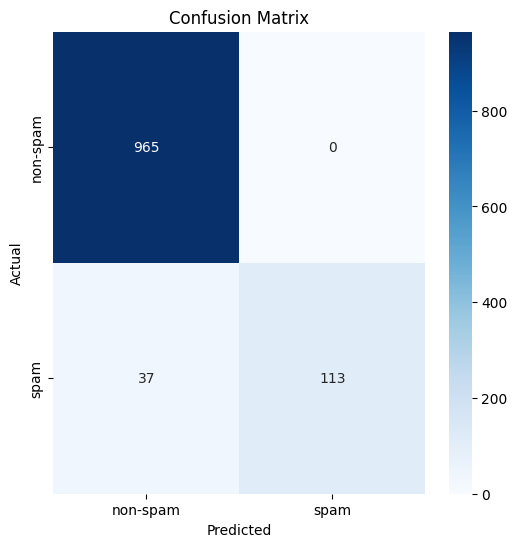

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['non-spam', 'spam'], yticklabels=['non-spam', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
import pickle
with open('spam_detector_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


In [28]:
with open('spam_detector_model.pkl', 'rb') as model_file:
  loaded_model = pickle.load(model_file)
with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
  loaded_vectorizer = pickle.load(vectorizer_file)
new_email = ["Congratulations, you've won a prize!"]
new_email_tfidf = loaded_vectorizer.transform(new_email)
prediction = loaded_model.predict(new_email_tfidf)
print(f'This email is {"spam" if prediction[0] == 1 else "non-spam"}')

This email is spam
